In [1]:
#=============================================================================
# CODE NAME     : Picturing Data.py
# PURPOSE       : Demonstrate Distributions and Visulations using Pandas,
#                 Scipy and Seaborn 
# APPLICATION   : Analyzing Mutual Fund Returns across risk categories
#=============================================================================

In [1]:
# Get the PANDAS Library
import numpy as np
import pandas as pd

# Load Input Data
infile = "C:\\Users\\Training\\Data Science using SAS and Python\\Data\\MF2000.xlsx"
returns = pd.read_excel(infile,sheet_name='Data')
print("Listing First Five Records")
returns.head()

Listing First Five Records


,Fund,Objective,Sales charge,Exp Ratio,Risk,Return 1999,Return Q1-2000,_3Yr Return
0,AMER CENT Gl Gold,SC,N,0.69,high,-3.2,-17.01,-22.82
1,FPA Paramount,GI,Y,1.03,high,1.6,-13.30,-12.57
2,FIDELITY emerging markets,IL,Y,1.45,high,70.5,1.58,-10.55
3,GPLDMAN SACHS Asis Gr A,IL,Y,1.85,high,59.4,1.93,-5.32
4,Berwyn,SC,N,1.20,high,-4.6,-5.75,-3.16


In [4]:
# Get the Skewness and Kurtosis for 3 Years returns
ret_skew = returns.groupby("Risk").skew()[["_3Yr Return"]]
print("Skewness: ")
ret_skew.transpose()

Skewness: 


Risk,avg,high,low
_3Yr Return,1.216081,0.273235,1.305763


In [5]:
ret_kur = returns.groupby("Risk").apply(pd.DataFrame.kurt)[["_3Yr Return"]]
print("Kurtosis: ")
ret_kur.transpose()

Kurtosis: 


Risk,avg,high,low
_3Yr Return,1.545188,-0.078729,1.86166


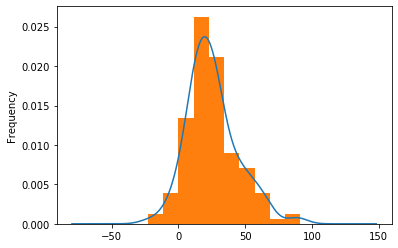

In [6]:
# Get the Histogram of 3 Years returns
ret_hist = returns["_3Yr Return"]
ret_hist.plot.kde()
ret_hist.plot.hist(density = True)

Probability Plot for 3 Years Returns: 


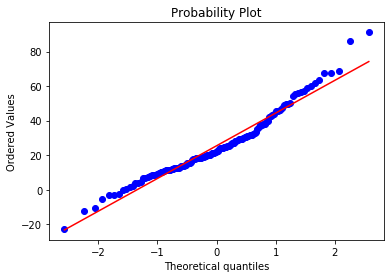

In [7]:
# Get the Probability Plot for 3 Years returns
import scipy.stats as stat
import matplotlib.pyplot as plt
ppplot = stat.probplot(ret_hist, plot = plt)
print("Probability Plot for 3 Years Returns: ")

Box Plot for 3 Years returns: 


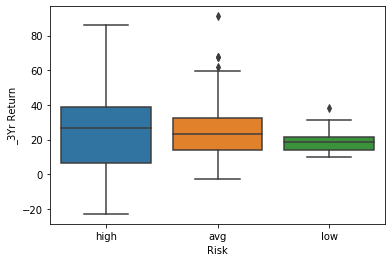

In [8]:
# Get the Box-Plot for 3 Years returns
import seaborn as sns
print("Box Plot for 3 Years returns: ")
box_plt = sns.boxplot(y = "_3Yr Return", x = "Risk", data = returns)

Scatter Plot of Returns (Return 1999 vs. Return Q1-2000): 


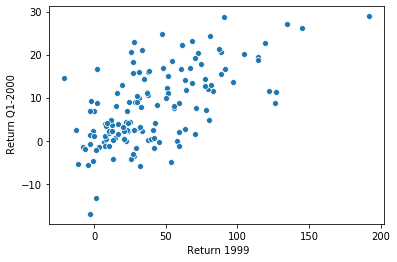

In [9]:
# Get the Scatter Plot of Returns (Return_1999 and Returns_Q1_2000)
print('Scatter Plot of Returns (Return 1999 vs. Return Q1-2000): ')
scatter_plt = sns.scatterplot(y = ' Return Q1-2000', x = ' Return 1999', data = returns)

In [5]:
# Utility to calculate the outliers

def util_get_outliers(in_dfn,analysis_var,iqr_cutoff):
    
    "This will calculate the outliers based on given data and variable"
    
    # Get the Q1 and Q3
    Q1,Q3 = in_dfn[analysis_var].quantile([0.25,0.75])
    lower = Q1 - (Q3 - Q1)*iqr_cutoff
    upper = Q3 + (Q3 - Q1)*iqr_cutoff
    
    # Get the Outliers
    df_outliers = in_dfn.loc[np.where((in_dfn[analysis_var] < lower) | (in_dfn[analysis_var] > upper))]
    
    return df_outliers

util_get_outliers(returns,"_3Yr Return",1.5)

,Fund,Objective,Sales charge,Exp Ratio,Risk,Return 1999,Return Q1-2000,_3Yr Return
0,AMER CENT Gl Gold,SC,N,0.69,high,-3.2,-17.01,-22.82
132,PRNCIPL PRESV PSE Tech,TK,Y,0.60,avg,114.6,18.80,67.45
133,INVESCO Tech,TK,N,1.20,avg,144.9,26.20,67.69
134,FIDELITY SELECTS Comp,TK,Y,1.25,high,81.0,24.40,68.58
135,FIRST AMERICAN Tech,TK,Y,1.15,high,191.8,28.90,86.13
136,NORTHERN Tech,TK,N,1.23,avg,134.5,27.10,91.15
